In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, sqrt, log
import tensorflow as tf
from plot_agent import plot, build_args,model_creation, plot3d

strategylong = True

env_type: tvs_lv_env


Logging to /tmp/openai-2020-12-19-12-23-09-876823

Names original ['DJ 50 TR', 'S&P 500 NET EUR', 'MSCI EM MKT EUR', 'I NKY NTR EUR', 'DAX 30 E', 'FTSE100 NTR E', 'SMI TR EUR', 'FTSEMIBN', 'HSI NTR EUR']
Simulating equity: 
DJ 50 TR
I NKY NTR EUR
Analizzo le maturità [0.08493151 0.16164384 0.24657534 0.32876712 0.41369863 0.49589041
 0.58082192 0.66575342 0.74794521 0.83287671 0.91506849 1.        ]
Drift time grid: [0.         0.48767123 1.48493151 2.48219178 3.47945205 4.49589041]
Drift values: [[ 0.0039     -0.002     ]
 [ 0.0041978  -0.002     ]
 [ 0.0043489  -0.002     ]
 [ 0.0038511  -0.002     ]
 [ 0.00365768 -0.002     ]
 [ 0.00344918 -0.002     ]]
Training ppo2 on tvs_lv_env:TVS_LV-v0 with arguments 
{'num_layers': 1, 'num_hidden': 6, 'lr': 0.0003, 'activation': <function tanh at 0x7fdc14d45d08>, 'load_path': './trained_agents/TVS_LV-v0/ppo2_1e8_1x6_3e-4long_month_observation_seed1364798666_', 'value_network': 'copy', 'vf_coef': 0.7, 'network': 'mlp'}




/home/ste/anaconda3/envs/reinforcement/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ste/anaconda3/envs/reinforcement/lib/python3.6/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


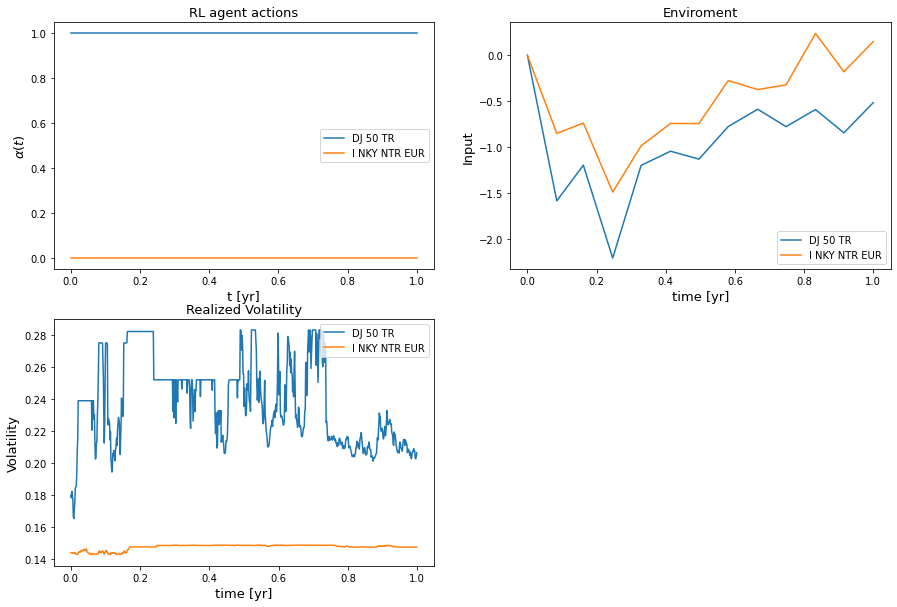

In [2]:
strategylong = True

Seed = 77

n_equity = 2
time_dep = True
constraint = "only_long"  #only_long, free, long_short_limit
model = 'LV'
sum_short=50./100.
sum_long=50./100.
input_normalize = 2
market_data=1
# configurations: which environment and agents
PLOT_VALUE = False  # otherwise plots actions
VARIABLE_INDEXES = (2,)  # which dimension to vary
VARIABLE_POINTS = 12
ENV = 'TVS_LV-v0'
REFERENCE_STATE = np.array([np.log(1), np.log(1),1/12])
X_MAX = 1
ACTION_SPACE_DESCRIPTION = '[log(S/S0), t]'
AGENTS = [
    #(build_args(ENV, 'ppo2', '3e7', '2', '3', '3e-4', custom_suffix='long_change_2long_two_asset_change_beta0.7'), {'action_grid_size': 0}, 'PPO')
(build_args(ENV, 'ppo2', '1e8', '1', '6', '3e-4', value_network='copy',beta='0.7',custom_suffix='long_month_observation_seed1364798666_'), {'action_grid_size': 0}, 'PPO')

]

reference_str = list(map(str, REFERENCE_STATE))
for ivar in VARIABLE_INDEXES:
    reference_str[ivar] = ':'
z_name = 'Value function' if PLOT_VALUE else 'Actions'
title = '{} at {} = ['.format(z_name, ACTION_SPACE_DESCRIPTION) + ', '.join(reference_str) + ']'

plt.figure(figsize=(15,10))
for (arg, env_args, lbl) in AGENTS:
    g = tf.Graph()
    sess = tf.InteractiveSession(graph=g)
    with g.as_default():
        plt.subplot(2,2,1)
        plot(arg, PLOT_VALUE, env_args, REFERENCE_STATE, VARIABLE_INDEXES, VARIABLE_POINTS, 
        title, lbl, X_MAX, all_time_dep = time_dep, seed=Seed, strategy_constraint= constraint,
        how_long=sum_long, how_short=sum_short, N_equity = n_equity, normalized=input_normalize, 
        market=market_data, pricing_model=model)
    
    months = np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.])
    time_grid = np.cumsum(months)/365.
    time_grid = np.insert(time_grid,0,0.)
    S, names, vola, time_vola = model_creation(seed = Seed, fixings = time_grid, n = n_equity, normalized = input_normalize, market = market_data, pricing_model=model, return_vola=1)
    months = np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.])
    for i in range(n_equity):
        plt.subplot(2,2,2)
        plt.plot(time_grid, S[:,i], label=names[i])
    plt.legend()
    plt.xlabel("time [yr]",fontsize=13)
    plt.ylabel(r"Input",fontsize=13)
    plt.title("Enviroment",fontsize=13)
    vola = vola[0]
    for i in range(n_equity):
        plt.subplot(2,2,3)
        plt.plot(time_vola, vola[:,i], label=names[i])
    plt.legend()
    plt.xlabel("time [yr]",fontsize=13)
    plt.ylabel(r"Volatility",fontsize=13)
    plt.title("Realized Volatility",fontsize=13)

plt.show()

0.3287671232876712
env_type: tvs_lv_env


/home/ste/anaconda3/envs/reinforcement/lib/python3.6/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Names original ['DJ 50 TR', 'S&P 500 NET EUR', 'MSCI EM MKT EUR', 'I NKY NTR EUR', 'DAX 30 E', 'FTSE100 NTR E', 'SMI TR EUR', 'FTSEMIBN', 'HSI NTR EUR']
Simulating equity: 
DJ 50 TR
I NKY NTR EUR
Analizzo le maturità [0.08493151 0.16164384 0.24657534 0.32876712 0.41369863 0.49589041
 0.58082192 0.66575342 0.74794521 0.83287671 0.91506849 1.        ]
Drift time grid: [0.         0.48767123 1.48493151 2.48219178 3.47945205 4.49589041]
Drift values: [[ 0.0039     -0.002     ]
 [ 0.0041978  -0.002     ]
 [ 0.0043489  -0.002     ]
 [ 0.0038511  -0.002     ]
 [ 0.00365768 -0.002     ]
 [ 0.00344918 -0.002     ]]
Training ppo2 on tvs_lv_env:TVS_LV-v0 with arguments 
{'num_layers': 1, 'num_hidden': 6, 'lr': 0.0003, 'activation': <function tanh at 0x7fdc14d45d08>, 'load_path': './trained_agents/TVS_LV-v0/ppo2_1e8_1x6_3e-4long_month_observation_seed1364798666_', 'network': 'mlp'}


<Figure size 576x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

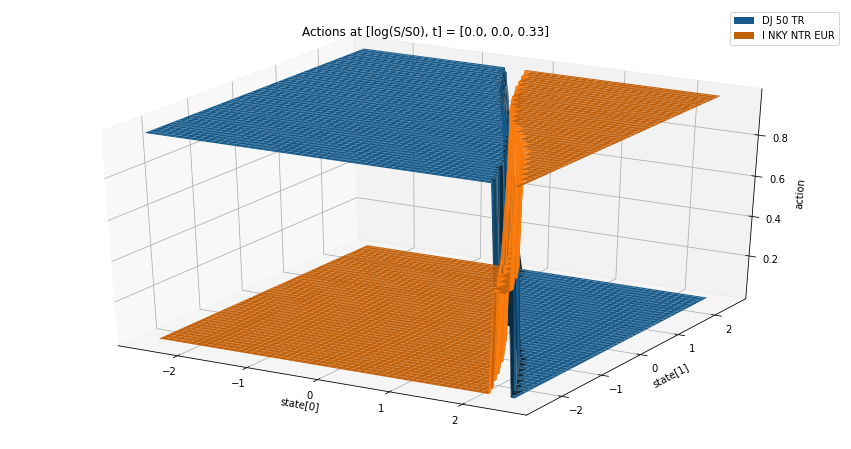

In [3]:
n_equity = 2
constraint = "only_long" 
input_normalize = 1
time_index = 4
market_data = 1
# configurations: which environment and agents
PLOT_VALUE = False# otherwise plots actions
VARIABLE_INDEXES = (0,1,)  # which dimension to vary
VARIABLE_POINTS = 100
months = np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.])
time_grid = np.cumsum(months)/365.
time_grid = np.insert(time_grid,0,0.)
time = time_grid[time_index]
ENV = 'TVS_LV-v0'
REFERENCE_STATE = np.array([np.log(1), np.log(1),time])
X_MAX = np.infty
ACTION_SPACE_DESCRIPTION = '[log(S/S0), t]'
AGENTS = [
 
#      (build_args(ENV, 'ppo2', '3e7', '1', '4', '3e-4', custom_suffix='long_change_2asset_normalized'), {'action_grid_size': 0}, 'PPO')
(build_args(ENV, 'ppo2', '1e8', '1', '6', '3e-4', custom_suffix='long_month_observation_seed1364798666_'), {'action_grid_size': 0}, 'PPO')    
]

reference_str = list(map(str, REFERENCE_STATE))
for ivar in VARIABLE_INDEXES:
    reference_str[ivar] = ':'
z_name = 'Value function' if PLOT_VALUE else 'Actions'
title = '{} at {} = ['.format(z_name, ACTION_SPACE_DESCRIPTION) + ', '.join(reference_str) + ']'

plt.figure(figsize=(8,5))
i = 0
#REFERENCE_STATE = np.array([log(1), log(1),time/12])
for (arg, env_args, lbl) in AGENTS:
    g = tf.Graph()
    print(time)
    REFERENCE_STATE = np.array([np.log(1), np.log(1),time])
    reference_str = list(map(str, REFERENCE_STATE.round(2)))
    z_name = 'Value function' if PLOT_VALUE else 'Actions'
    title = '{} at {} = ['.format(z_name, ACTION_SPACE_DESCRIPTION) + ', '.join(reference_str) + ']'
    sess = tf.InteractiveSession(graph=g)
    with g.as_default():
        ax = plot3d(arg, PLOT_VALUE, env_args, REFERENCE_STATE, VARIABLE_INDEXES, VARIABLE_POINTS, title, lbl, 
                    X_MAX,strategy_constraint=constraint, N_equity = n_equity, market=market_data)
   # ax.view_init(30, 50)
    #plt.savefig("3d_action_time_beta_04"+str(i)+".png")
   # i=i+1
